<a href="https://colab.research.google.com/github/devasworski/Deeper-Networks-for-Image-Classification/blob/main/GoogleNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GoogleNet for Image Classification

Using GoogleNet on the MNIST and CIFAR datasets for image classification.

## Download dependencies (Only for Google Colab)

In [ ]:
!git clone https://github.com/devasworski/Deeper-Networks-for-Image-Classification.git
!mv "/content/Deeper-Networks-for-Image-Classification/py/helper.py" "/content/"
!mv "/content/Deeper-Networks-for-Image-Classification/py/datasets.py" "/content/"
!mv "/content/Deeper-Networks-for-Image-Classification/py/googLeNet.py" "/content/"
!rm "/content/Deeper-Networks-for-Image-Classification/" -r

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Imports

In [2]:
try:
  from py import googLeNet
  from py import helper as nnh
except ImportError:
  import googLeNet
  import helper as nnh

## Hyperparameters

In [2]:
EPOCHS = 20
LEARNING_RATE = 0.01
DATASET = nnh.Dataset.MNIST
RUNTIME = nnh.Runtime.local
OPTIMIZER = nnh.Optimizer.SGD
MODELNAME = 'GoogLeNet'
CHECKPOINT_PATH = "/content/drive/MyDrive/Deeper-Networks-for-Image-Classification/Checkpoints/GoogLeNet/"+str(DATASET.value)+"/"+str(OPTIMIZER.value)+"/cp-{epoch:04d}.ckpt" if RUNTIME == nnh.Runtime.colab else "./Checkpoints/GoogLeNet/"+str(DATASET.value)+"/"+str(OPTIMIZER.value)+"/cp-{epoch:04d}.ckpt"
BATCH_SIZE = 128

## Load Dataset

In [5]:
(x_train, y_train), (x_val, y_val), (x_test, y_test) = nnh.getDataset(DATASET)

## Load Model

In [3]:
model = googLeNet.googlenet(10)
model.summary()
model.compile(optimizer=nnh.getOptimizer(OPTIMIZER,LEARNING_RATE), loss='categorical_crossentropy', metrics=['accuracy'])

2022-05-02 00:29:17.660530: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "GoogLeNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 112, 112, 64  9472        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 56, 56, 64)   0           ['conv2d[0][0]']                 
                                                                                          

## Train Model

In [ ]:
model.fit(x=x_train, y=y_train, epochs=EPOCHS, verbose=1, validation_data=(x_test, y_test), batch_size=BATCH_SIZE, callbacks=nnh.CheckpointCallback(CHECKPOINT_PATH))

## Evaluate Model

### Load Checkpoint

In [4]:
epoch_num = EPOCHS
path = CHECKPOINT_PATH.format(epoch=epoch_num)
model.load_weights(path)

### Print Evaluation

In [ ]:
nnh.printAccuracy(model,x_test,y_test,4)

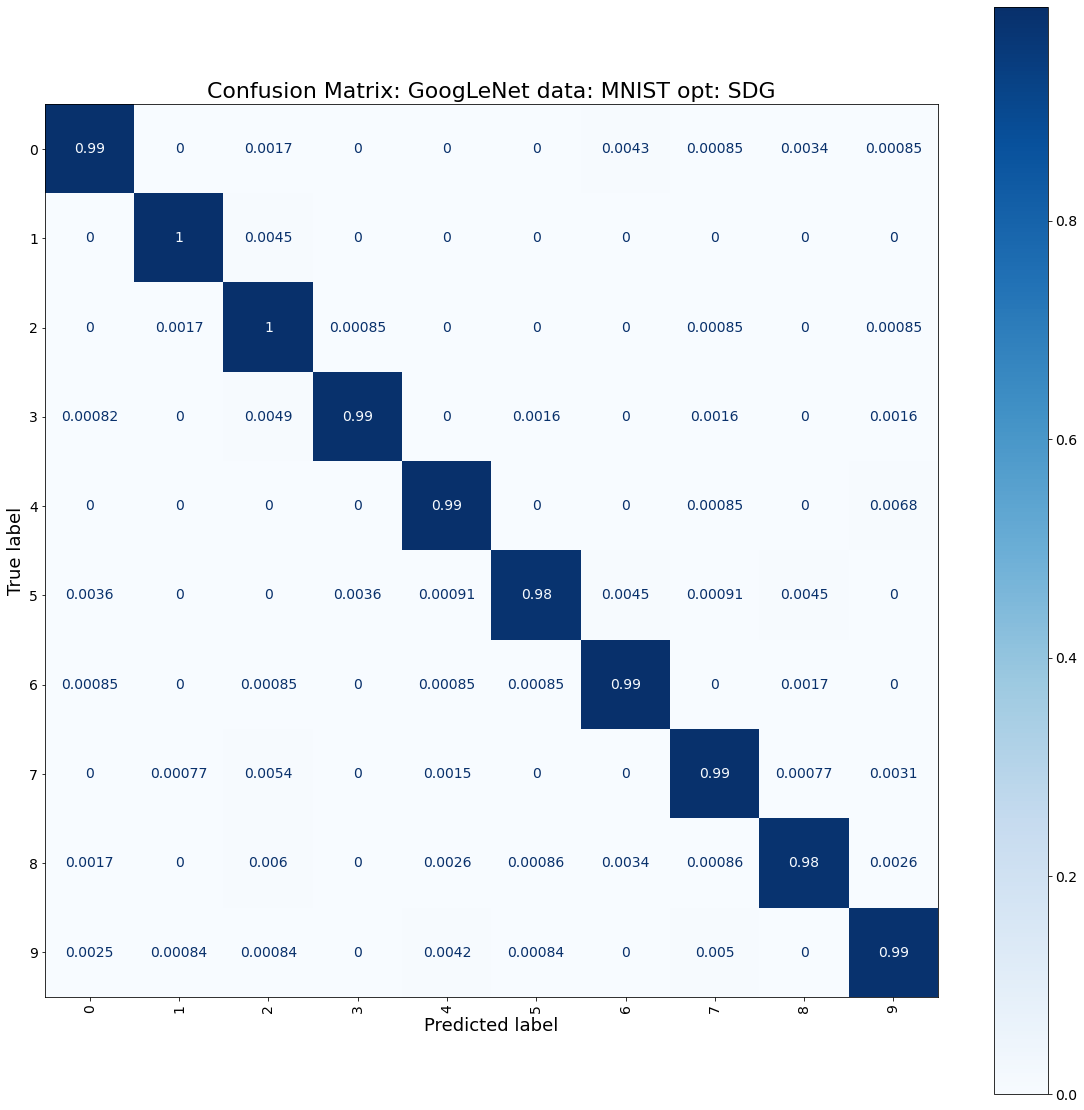

In [6]:
nnh.plot_confusion_matrix(model,x_test,y_test,DATASET,MODELNAME,OPTIMIZER)